
# Text Embeddings with Bag of Words and TF-IDF

In this tutorial, we will convert **preprocessed Spotify reviews** into **numerical embeddings** using:

1. **Bag of Words (BoW)** – Counts word occurrences  
2. **TF-IDF (Term Frequency-Inverse Document Frequency)** – Adjusts word importance based on rarity



## 1. Load the Dataset


In [1]:

import pandas as pd

# Load the dataset
df = pd.read_csv('spotify_reviews_cleaned.csv')  # Replace with your cleaned file path
print(f"Dataset contains {len(df)} reviews.")
df.head()


Dataset contains 61594 reviews.


,time_submitted,review,rating,total_thumbsup,reply,review_length,cleaned_review,cleaned_review_length
0,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN,216,good sometimes doesnt load music play like sec...,115
1,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN,272,app good hard navigate wont let play song clic...,142
2,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN,493,app would good taking device start comp there ...,296
3,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN,263,use sooo good back downloaded free version cou...,168
4,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN,279,even though communicated lyric feature availab...,179



## 2. Bag of Words (BoW)

**Bag of Words (BoW)** is a simple way to represent text numerically:
- Each **unique word** in the corpus becomes a **column**.  
- Each **document** (review) becomes a **row**.  
- The value is the **count of the word** in that document.

### Example:
For the sentences:
- `"I love music"`  
- `"Music is life"`  

The **BoW matrix** looks like this:

| Document  | I | love | music | is | life |
|-----------|---|------|-------|----|------|
| Sentence 1| 1 | 1    | 1     | 0  | 0    |
| Sentence 2| 0 | 0    | 1     | 1  | 1    |



In [6]:

from sklearn.feature_extraction.text import CountVectorizer

# Create a Bag of Words model
vectorizer = CountVectorizer(max_features=50, stop_words='english')  # Limit to the top 50 words for simplicity
bow_matrix = vectorizer.fit_transform(df['cleaned_review'])

# Convert to DataFrame for easy viewing
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first 5 rows of the BoW matrix
bow_df.head()


,ad,add,annoying,app,best,better,day,doesnt,dont,feature,...,time,update,use,used,using,want,way,wont,work,year
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,2,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0



## 3. TF-IDF

**TF-IDF (Term Frequency-Inverse Document Frequency)** adjusts the BoW approach by:  
- **Term Frequency (TF):** Counts how often a word appears  
- **Inverse Document Frequency (IDF):** Reduces the importance of common words 

### Example:
For the sentences:
- `"I love music"`  
- `"Music is life"`  

If "music" appears in **both sentences**, its importance (IDF) is **reduced**, but unique words like "life" get **higher scores**


#### Equations of TF-IDF:

$
\text{TF-IDF}(t, d) = \frac{f_{t,d}}{\sum_{k} f_{k,d}} \times \log \left( \frac{N}{1 + n_{t}} \right)
$


### 📊 Example of TF-IDF Calculation

Suppose we have three documents:

- **Document 1:** "I love music"  
- **Document 2:** "Music is life"  
- **Document 3:** "I enjoy music and life"  

**Step 1: Term Frequency (TF):**
The formula is:
$
\text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$

| Word       | TF in D1 | TF in D2 | TF in D3 |
|------------|---------|---------|---------|
| **I**      | 0.33    | 0       | 0.2     |
| **love**   | 0.33    | 0       | 0       |
| **music**  | 0.33    | 0.33    | 0.2     |
| **is**     | 0       | 0.33    | 0       |
| **life**   | 0       | 0.33    | 0.2     |
| **enjoy**  | 0       | 0       | 0.2     |
| **and**    | 0       | 0       | 0.2     |

---

**Step 2: Inverse Document Frequency (IDF):**  
The formula is:
$
\text{IDF}(t) = \log \left( \frac{N}{1 + n_{t}} \right)
$

- $ N = 3 $ (total number of documents)  
- $n_{t} = $ number of documents containing the term  

| Word       | Documents Containing Word | IDF Value |
|------------|--------------------------|---------------------------|
| **I**      | 2                        | $$\log(1)=0$$           |
| **love**   | 1                        | $$\log(1.5)\approx 0.176$$ |
| **music**  | 3                        | $$\log(0.75)=-0.124$$ |
| **is**     | 1                        | $$\log(1.5)\approx0.176$$ |
| **life**   | 2                        | $$\log(1)=0 $$ |
| **enjoy**  | 1                        | $$\log(1.5)\approx0.176$$ |
| **and**    | 1                        | $$\log(1.5)\approx0.176$$ |

---

**Step 3: TF-IDF Calculation:**  
$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$

| Word       | TF-IDF in D1 | TF-IDF in D2 | TF-IDF in D3 |
|------------|-------------|-------------|-------------|
| **love**   | 0.33 * 0.176 = 0.058 | 0 | 0 |
| **music**  | 0.33 * -0.124 = -0.0409 | 0.33 * -0.124 = -0.0409 | 0.2 * -0.124 = -0.0248 |
| **enjoy**  | 0 | 0 | 0.2 * 0.176 = 0.0352 |

---

**Observation:**  
- Common words like **"music"** have lower TF-IDF scores.  
- Unique words like **"love"** and **"enjoy"** have higher scores.  

---


In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF model
tfidf_vectorizer = TfidfVectorizer(max_features=50, stop_words='english')  # Limit to 20 features for simplicity
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Convert to DataFrame for easy viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first 5 rows of the TF-IDF matrix
tfidf_df.head()


,ad,add,annoying,app,best,better,day,doesnt,dont,feature,...,time,update,use,used,using,want,way,wont,work,year
0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.325042,0.0,0.000000,...,0.283311,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.623939,0.0
1,0.0,0.0,0.00000,0.102389,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.236017,0.000000,0.0
2,0.0,0.0,0.49425,0.222394,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.208253,0.2503,0.000000,0.000000,0.0
3,0.0,0.0,0.00000,0.110020,0.0,0.251674,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.205055,0.0,0.0,0.206048,0.0000,0.000000,0.000000,0.0
4,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.260200,0.0,0.594416,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0



## 4. Comparing BoW and TF-IDF

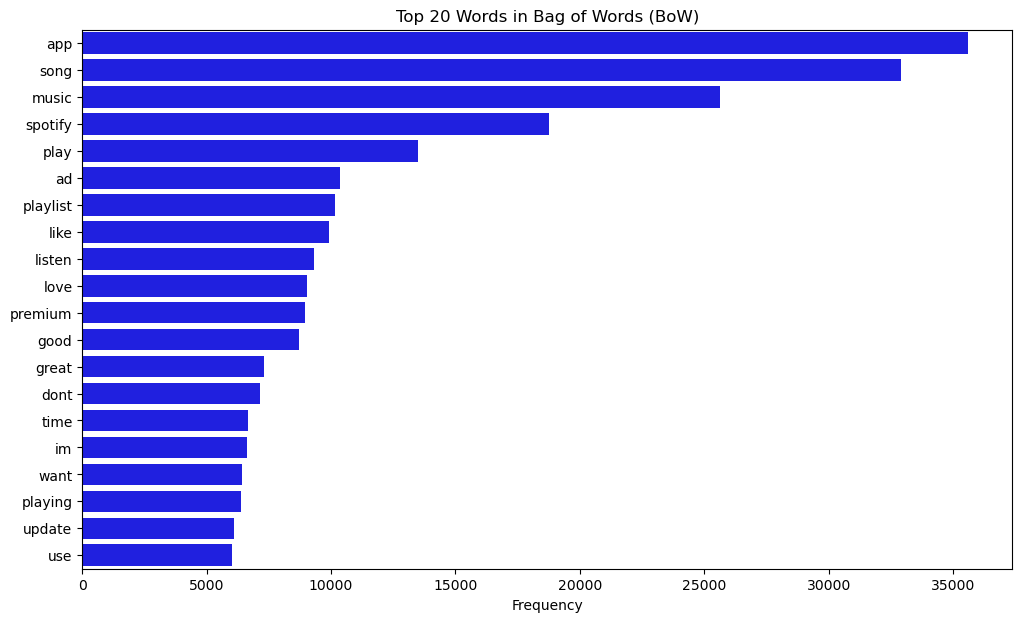

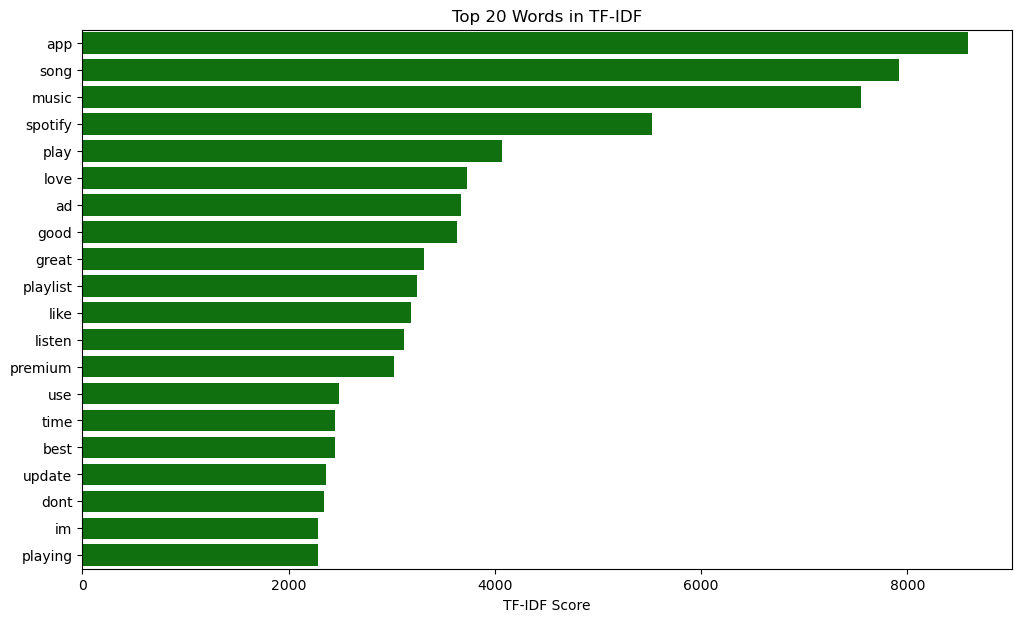

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top Words from BoW
plt.figure(figsize=(12,7))
sns.barplot(x=bow_df.sum().sort_values(ascending=False)[:20].values, 
            y=bow_df.sum().sort_values(ascending=False)[:20].index, color='blue')
plt.title('Top 20 Words in Bag of Words (BoW)')
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

# Plot Top Words from TF-IDF
plt.figure(figsize=(12,7))
sns.barplot(x=tfidf_df.sum().sort_values(ascending=False)[:20].values, 
            y=tfidf_df.sum().sort_values(ascending=False)[:20].index, color='green')
plt.title('Top 20 Words in TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('')
plt.show()


## 5. Summary

#### ✅ Pros and ❌ Cons of BoW and TF-IDF:

| Aspect                | **Bag of Words (BoW)** | **TF-IDF (Term Frequency-Inverse Document Frequency)** |
|-----------------------|------------------------|------------------------------------------------------|
| ✅ **Simplicity**       | Easy to implement and interpret | Also simple and easy to compute |
| ✅ **Efficiency**       | Fast and efficient for large datasets | Efficient and scalable for large datasets |
| ✅ **Interpretability** | Directly shows word importance based on frequency | Highlights important words by penalizing common terms |
| ❌ **Context Awareness** | Does not consider word order or context | Loses semantic meaning, only based on frequency |
| ❌ **Sparsity**         | Produces large, sparse matrices | Also results in large, sparse matrices |
| ❌ **Vocabulary Dependence** | Requires large vocabulary and fails on new words | Requires large vocabulary and suffers from vocabulary mismatch issues |


- BoW and TF-IDF are excellent starting points for understanding text vectorization but fail to capture semantic meaning and context
- For more advanced tasks like text classification, topic modeling, and semantic similarity, techniques like **Word2Vec**, **FastText**, and **BERT** are more effective

- Transformer-based models (e.g., **BERT**, **SBERT**) are the current state-of-the-art for most NLP tasks
